In [7]:
library(ggmap)
library(ggplot2)
library(maps)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)
library(tidyverse)

## v1

Попытка докрутить [это решение](https://stackoverflow.com/questions/72840281/recenter-map-that-crosses-international-dateline-with-ggplot-and-geom-sf).

In [2]:
domainCRS <- paste('PROJCS["ProjWiz_Custom_Lambert_Azimuthal"',
        'GEOGCS["GCS_WGS_1984"',
        'DATUM["D_WGS_1984"',
        'SPHEROID["WGS_1984",6378137.0,298.257223563]]',
        'PRIMEM["Greenwich",0.0]',
        'UNIT["Degree",0.0174532925199433]]',
        'PROJECTION["Lambert_Azimuthal_Equal_Area"]',
        'PARAMETER["False_Easting",0.0]',
        'PARAMETER["False_Northing",0.0]',
        'PARAMETER["Central_Meridian",109.69]',
        'PARAMETER["Latitude_Of_Origin",12.55]',
        'UNIT["Meter",1.0]]',
        sep = ',')
countries_df <- ne_countries(returnclass = "sf", country = c("United States of America", "Russia"))
segment_df <- data.frame(x = c(158.634805), y = c(53.038483), xend = c(-149.863129), yend = c(61.217381))

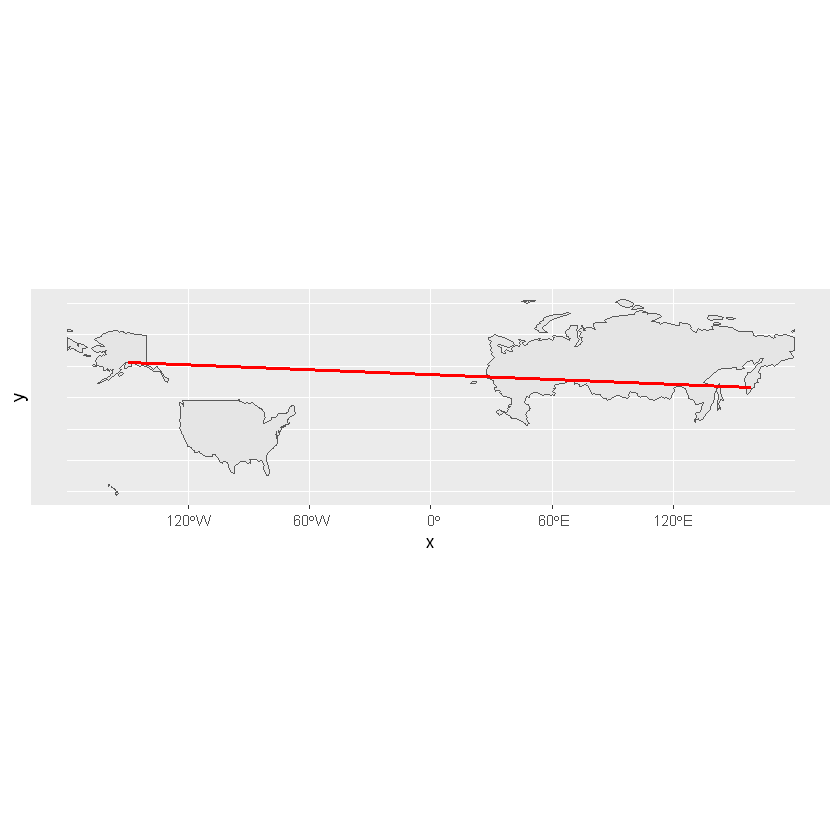

In [3]:
p <- ggplot() +
    geom_sf(data = countries_df) +
    geom_segment(aes(x = x, y = y, xend = xend, yend = yend), data = segment_df, color = "red", linewidth = 1)
p

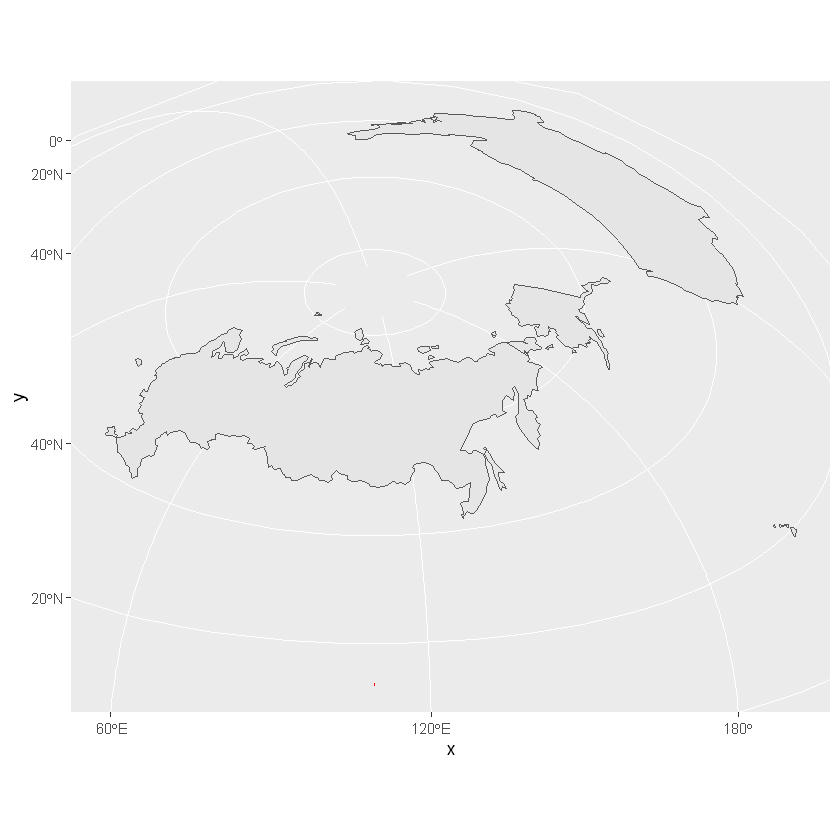

In [4]:
p + coord_sf(crs = domainCRS)

## v2

Допиленная версия GPT-решения.

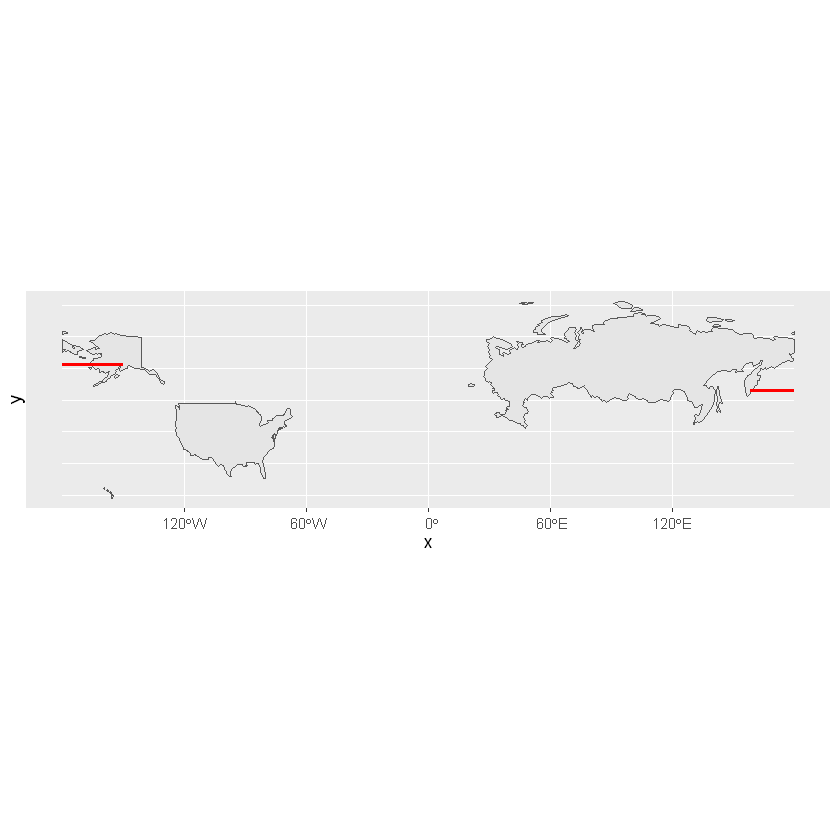

In [5]:
# Start ggplot
p <- ggplot() + geom_sf(data = countries_df)

# Draw line segment on the map
# Your points are separated by the 180th meridian, so we need to deal with them separately
# First, draw a line to the 180th meridian from the starting point, then from the 180th meridian to the ending point
p <- p + geom_segment(aes(x = 158.634805, y = 53.038483, xend = 180, yend = 53.038483), colour = "red", linewidth = 1)
p <- p + geom_segment(aes(x = -180, y = 61.217381, xend = -149.863129, yend = 61.217381), colour = "red", linewidth = 1)

# Display plot
print(p)

## v3

Допиленная версия другого GPT-решения.

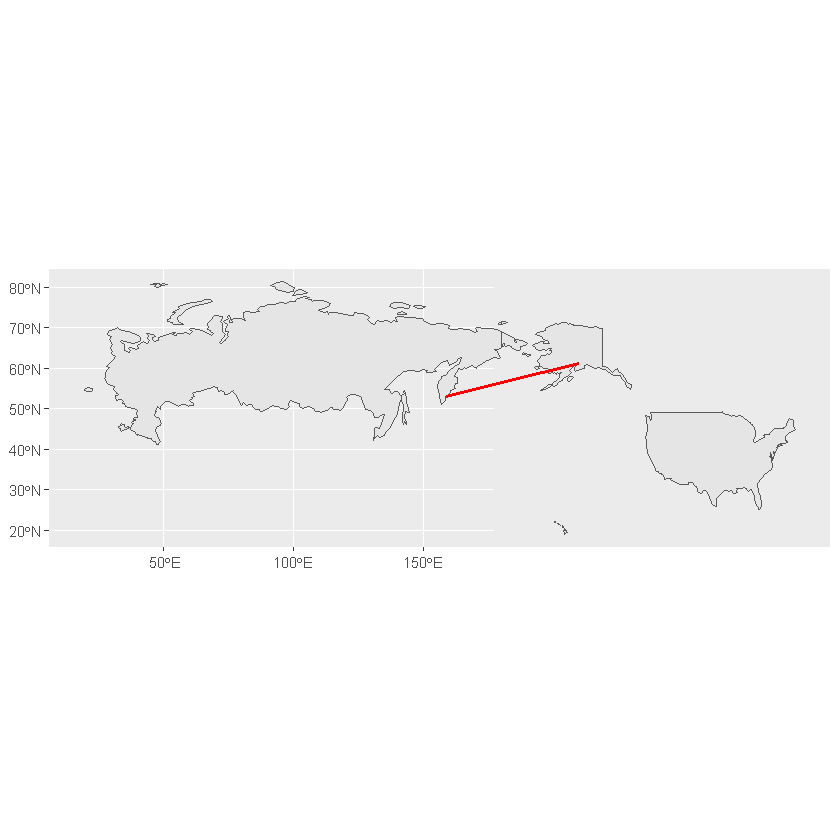

In [6]:
# Define the coordinates of the line segment
start_coord <- c(158.634805, 53.038483)
end_coord <- c(-149.863129, 61.217381)

# Create a simple feature object for the line segment
line <- st_sfc(st_linestring(rbind(start_coord, end_coord)), crs = st_crs(countries_df))

# If line crosses the antimeridian, split it into two parts
line <- st_wrap_dateline(line, options = c("WRAPDATELINE=YES", "DATELINEOFFSET=180"), quiet = TRUE)

# Shift the coordinates to center the segment
line_shifted <- st_shift_longitude(line)
countries_shifted <- st_shift_longitude(countries_df)

# Draw the map and line segment
ggplot() +
  geom_sf(data = countries_shifted) +
  geom_sf(data = line_shifted, color = "red", linewidth = 1) +
  coord_sf()